# **INDICE**
* ### OBJETIVOS
* ### DATA PREPARATION
* ### ANALISIS

## **OBJETIVOS**

En este primer notebook se calcula el potencial de los diferetnes equipos clasificados para el Mundial de Qatar 2022 utilizando las estadísticas de los jugadores según el FIFA 23 puesto que son las estadísticas más acutalizadas hasta la fecha.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
FIFA23 = pd.read_csv('./data/fifa23.csv')
FIFA23.shape

(18539, 89)

In [3]:
FIFA23.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [4]:
interesting_cols = ['Known As', 'Age', 'Nationality', 'Overall', 'Potential', 'Club Name', 'International Reputation', 'Best Position', 'TotalStats', 'BaseStats', 'Value(in Euro)', 'Wage(in Euro)']
FIFA23 =pd.DataFrame(FIFA23, columns=interesting_cols)
FIFA23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Known As                  18539 non-null  object
 1   Age                       18539 non-null  int64 
 2   Nationality               18539 non-null  object
 3   Overall                   18539 non-null  int64 
 4   Potential                 18539 non-null  int64 
 5   Club Name                 18539 non-null  object
 6   International Reputation  18539 non-null  int64 
 7   Best Position             18539 non-null  object
 8   TotalStats                18539 non-null  int64 
 9   BaseStats                 18539 non-null  int64 
 10  Value(in Euro)            18539 non-null  int64 
 11  Wage(in Euro)             18539 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.7+ MB


In [5]:
FIFA23.head()

,Known As,Age,Nationality,Overall,Potential,Club Name,International Reputation,Best Position,TotalStats,BaseStats,Value(in Euro),Wage(in Euro)
0,L. Messi,35,Argentina,91,91,Paris Saint-Germain,5,CAM,2190,452,54000000,195000
1,K. Benzema,34,France,91,91,Real Madrid CF,4,CF,2147,455,64000000,450000
2,R. Lewandowski,33,Poland,91,91,FC Barcelona,5,ST,2205,458,84000000,420000
3,K. De Bruyne,31,Belgium,91,91,Manchester City,4,CM,2303,483,107500000,350000
4,K. Mbappé,23,France,91,95,Paris Saint-Germain,4,ST,2177,470,190500000,230000


## **DATA PREPARATION**

* Se filtra por las selecciones que participan en el torneo.

In [6]:
teams = ['Qatar', 'Ecuador', 'Netherlands', 'Senegal',              # GROUP A
         'United States', 'Wales', 'England', 'Iran',               # GROUP B
         'Saudi Arabia', 'Argentina', 'Mexico', 'Poland',           # GROUP C
         'Australia', 'Denmark', 'France', 'Tunisia',               # GROUP D
         'Germany', 'Costa Rica', 'Spain', 'Japan',                 # GROUP E
         'Belgium', 'Canada', 'Croatia', 'Morocco',                 # GROUP F
         'Brazil', 'Cameroon', 'Serbia', 'Switzerland',             # GROUP G
         'Korea Republic', 'Ghana', 'Portugal', 'Uruguay']          # GROUP H

FIFA23 = FIFA23.rename(columns={'Best Position': 'Position', 'Known As': 'Name'})
FIFA23 = FIFA23[(FIFA23['Nationality'].apply(lambda x: x in teams))]
FIFA23['Nationality'].unique()


array(['Argentina', 'France', 'Poland', 'Belgium', 'Germany', 'Portugal',
       'Netherlands', 'England', 'Brazil', 'Korea Republic', 'Senegal',
       'Costa Rica', 'Croatia', 'Spain', 'Serbia', 'Switzerland',
       'Uruguay', 'Ghana', 'Morocco', 'Cameroon', 'Canada', 'Denmark',
       'Mexico', 'United States', 'Iran', 'Wales', 'Japan', 'Ecuador',
       'Tunisia', 'Australia', 'Saudi Arabia', 'Qatar'], dtype=object)

In [7]:
FIFA23.head()

,Name,Age,Nationality,Overall,Potential,Club Name,International Reputation,Position,TotalStats,BaseStats,Value(in Euro),Wage(in Euro)
0,L. Messi,35,Argentina,91,91,Paris Saint-Germain,5,CAM,2190,452,54000000,195000
1,K. Benzema,34,France,91,91,Real Madrid CF,4,CF,2147,455,64000000,450000
2,R. Lewandowski,33,Poland,91,91,FC Barcelona,5,ST,2205,458,84000000,420000
3,K. De Bruyne,31,Belgium,91,91,Manchester City,4,CM,2303,483,107500000,350000
4,K. Mbappé,23,France,91,95,Paris Saint-Germain,4,ST,2177,470,190500000,230000


## **ANALISIS**

### TOP 25 JUGADORES

Text(0.5, 1.0, 'Top 25 jugadores Mundial Qatar 2022')

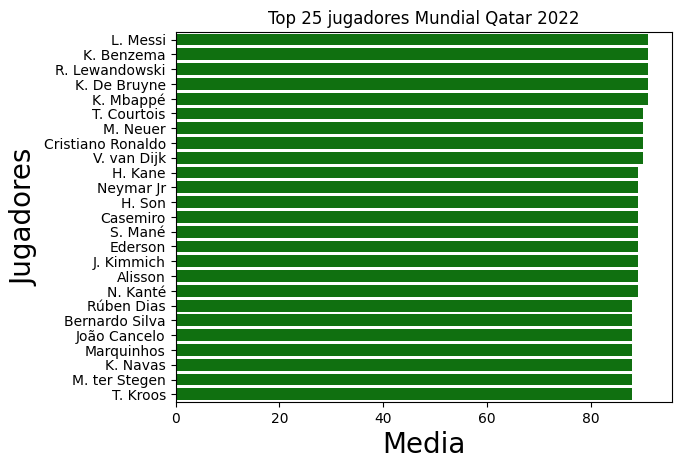

In [8]:
overall = FIFA23['Overall'].head(25)
players = FIFA23['Name'].head(25)

ax = sns.barplot(x=overall, y=players, color='green', orient='h')
plt.ylabel('Jugadores', size=20)
plt.xlabel('Media', size=20)
plt.title('Top 25 jugadores Mundial Qatar 2022')

### MEJORES ONCES POR FORMACION

In [39]:
def get_best_squad(formation):
    fifa23_cp = FIFA23.copy()
    aux = []

    for pos in formation:
        aux.append([
            pos,
            fifa23_cp.loc[[fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].idxmax()]]['Name'].to_string(index=False),
            fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].max(),
            fifa23_cp.loc[[fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].idxmax()]]['Age'].to_string(index=False),
            fifa23_cp.loc[[fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].idxmax()]]['Club Name'].to_string(index=False),
            fifa23_cp.loc[[fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].idxmax()]]['Value(in Euro)'].to_string(index=False),
            fifa23_cp.loc[[fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].idxmax()]]['Wage(in Euro)'].to_string(index=False),
        ])
        fifa23_cp.drop(fifa23_cp[fifa23_cp['Position'] == pos]['Overall'].idxmax(), inplace=True)

    return pd.DataFrame(np.array(aux).reshape(11,7),
                        columns = ['Position', 'Name', 'Overall', 'Age', 'Club Name', 'Value(in Euro)', 'Wage(in Euro)']).to_string(index = False)

**MEJOR 11 CON FORMACION 4-3-3**

In [40]:
squad433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CM', 'RW', 'ST', 'LW']
print('--------------------------------------- 4-3-3 --------------------------------------\n')
print(get_best_squad(squad433))


--------------------------------------- 4-3-3 --------------------------------------

Position           Name Overall Age           Club Name Value(in Euro) Wage(in Euro)
      GK    T. Courtois      90  30      Real Madrid CF       90000000        250000
      RB      K. Walker      85  32     Manchester City       37500000        170000
      CB    V. van Dijk      90  30           Liverpool       98000000        230000
      CB     Rúben Dias      88  25     Manchester City      107500000        230000
      LB   João Cancelo      88  28     Manchester City       82500000        250000
     CDM       Casemiro      89  30   Manchester United       86000000        240000
      CM   K. De Bruyne      91  31     Manchester City      107500000        350000
      CM       T. Kroos      88  32      Real Madrid CF       72000000        310000
      RW    Á. Di María      84  34            Juventus       20000000        160000
      ST R. Lewandowski      91  33        FC Barcelona       84

**MEJOR 11 CON FOMRACON 4-4-2**

In [36]:
squad442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print('--------------------------------------- 4-4-2 --------------------------------------\n')
print(get_best_squad(squad442))

--------------------------------------- 4-4-2 --------------------------------------

Position           Name Overall Age           Club Name Value(in Euro) Wage(in Euro)
      GK    T. Courtois      90  30      Real Madrid CF       90000000        250000
      RB      K. Walker      85  32     Manchester City       37500000        170000
      CB    V. van Dijk      90  30           Liverpool       98000000        230000
      CB     Rúben Dias      88  25     Manchester City      107500000        230000
      LB   João Cancelo      88  28     Manchester City       82500000        250000
      RM      S. Gnabry      85  26   FC Bayern München       59000000        100000
      CM   K. De Bruyne      91  31     Manchester City      107500000        350000
      CM       T. Kroos      88  32      Real Madrid CF       72000000        310000
      LM        S. Mané      89  30   FC Bayern München       99500000        145000
      ST R. Lewandowski      91  33        FC Barcelona       84

**MEJOR 11 CON FORMACION 4-2-3-1**

In [37]:
squad4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print('-------------------------------------- 4-2-3-1 -------------------------------------\n')
print(get_best_squad(squad4231))

-------------------------------------- 4-2-3-1 -------------------------------------

Position           Name Overall Age           Club Name Value(in Euro) Wage(in Euro)
      GK    T. Courtois      90  30      Real Madrid CF       90000000        250000
      RB      K. Walker      85  32     Manchester City       37500000        170000
      CB    V. van Dijk      90  30           Liverpool       98000000        230000
      CB     Rúben Dias      88  25     Manchester City      107500000        230000
      LB   João Cancelo      88  28     Manchester City       82500000        250000
     CDM       Casemiro      89  30   Manchester United       86000000        240000
     CDM     J. Kimmich      89  27   FC Bayern München      105500000        130000
     CAM       L. Messi      91  35 Paris Saint-Germain       54000000        195000
     CAM Bernardo Silva      88  27     Manchester City       97500000        260000
     CAM      T. Müller      87  32   FC Bayern München       63

**MEJOR 11 CON FORMACION 4-4-1-1**

In [38]:
squad4411 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'CF', 'ST']
print('-------------------------------------- 4-4-1-1 -------------------------------------\n')
print(get_best_squad(squad4411))

-------------------------------------- 4-4-1-1 -------------------------------------

Position           Name Overall Age         Club Name Value(in Euro) Wage(in Euro)
      GK    T. Courtois      90  30    Real Madrid CF       90000000        250000
      RB      K. Walker      85  32   Manchester City       37500000        170000
      CB    V. van Dijk      90  30         Liverpool       98000000        230000
      CB     Rúben Dias      88  25   Manchester City      107500000        230000
      LB   João Cancelo      88  28   Manchester City       82500000        250000
      RM      S. Gnabry      85  26 FC Bayern München       59000000        100000
      CM   K. De Bruyne      91  31   Manchester City      107500000        350000
      CM       T. Kroos      88  32    Real Madrid CF       72000000        310000
      LM        S. Mané      89  30 FC Bayern München       99500000        145000
      CF     K. Benzema      91  34    Real Madrid CF       64000000        450000
 

## **ANALISIS DE LOS EQUIPOS**
### TOP 10 EQUIPOS MAS PROMETEDORES DEL MUNDIAL

Definimos una funcion con la que conseguimos la mejor formacion para cada equipo actual y la formacion con mejor potencial de cara a un futuro.

Definimos tambien una funcion que hace un pequeño resumen de la seleccion dada.

In [41]:
def get_best_squad(formation, nationality, m = 'Overall'):
    fifa23cp = FIFA23.copy()
    fifa23cp - fifa23cp[fifa23cp['Nationality'] == nationality]
    aux = []

    for pos in formation:
        aux.append([
            fifa23cp.loc[[fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax()]]['Position'].to_string(index = False),
            fifa23cp.loc[[fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax()]]['Name'].to_string(index = False), 
            fifa23cp[fifa23cp['Position'].str.contains(pos)][m].max(),
            fifa23cp.loc[[fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax()]]['Age'].to_string(index = False),
            fifa23cp.loc[[fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax()]]['Club Name'].to_string(index = False),
            fifa23cp.loc[[fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax()]]['Value (in Euro)'].to_string(index = False),
            fifa23cp.loc[[fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax()]]['Wage (in Euro)'].to_string(index = False)
        ])

        fifa23cp.drop(fifa23cp[fifa23cp['Position'].str.contains(pos)][m].idxmax(), inplace = True)

    return np.mean([x[2] for x in aux]).round(2), pd.DataFrame(np.array(aux).reshape(11,7), columns=['Position', 'Name', m, 'Age', 'Club Name', 'Value (in Euro)', 'Wage (in Euro)']).to_string(index = False)

In [42]:
def get_summary(squad_list, formations, nat_list):
    summary = []

    for n in nat_list:
        count = 0
        for s in squad_list:
            try:
                overall_tmp_rating, _ = get_best_squad(formation=s, nationality=n, m='Overall')
                potential_tmp_rating, _ = get_best_squad(formation=s, nationality=n, m='Potential')

                summary.append([n, formations[count], overall_tmp_rating.round(2), potential_tmp_rating.round(2)])
                count += 1
            except:
                count += 1
    
    return summary

In [43]:

squad343_options = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad442_options = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM|RW', 'CM|CDM', 'CM|CAM', 'LM|LW', 'ST|CF', 'ST|CF']
squad433_options = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad4231_options = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad4312_options = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']

squad_list = [squad343_options, squad442_options, squad433_options, squad4231_options, squad4312_options]
formations = ['3-4-3', '4-4-2', '4-3-3', '4-2-3-1', '4-3-1-2']
